In [2]:
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset.py
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-11-24 08:50:11--  https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset.py
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/azii22000/deeplearning-tensorflow2-notebooks/master/dataset.py [following]
--2023-11-24 08:50:11--  https://raw.githubusercontent.com/azii22000/deeplearning-tensorflow2-notebooks/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2023-11-24 08:50:12 (41.3 MB/s) - ‘dataset.py’ saved [917/917]

--2023-

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda



import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# **تبدیل کردن اعداد به صورت one hot**
Ex: 6 ==> 0 0 0 0 0 0 1 0 0 0

In [5]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

هر پیکسل مقداری بین 0 تا 254 دارد پس با تقسیم بر 255 می توان مقداری بین 0-1 داشت که به معنای نرمال ساری می باشد

In [6]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

### **تعریف مدل شبکه عصبی**
تعداد نرونهای ورودی = 25 عکس ها 5*5 یعنی 25 تایی هستند__
نعداد نرونهای خروجی = 10 چون اعداد 1-10 خروجی هستند

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2314 (9.04 KB)
Trainable params: 2314 (9.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 5s 19ms/step - loss: 2.3212 - accuracy: 0.1625 - val_loss: 2.1992 - val_accuracy: 0.1950
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 2.1145 - accuracy: 0.2725 - val_loss: 2.0310 - val_accuracy: 0.3250
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 1.9505 - accuracy: 0.4137 - val_loss: 1.8693 - val_accuracy: 0.4800
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 1.7921 - accuracy: 0.5900 - val_loss: 1.7147 - val_accuracy: 0.6350
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 1.6383 - accuracy: 0.6750 - val_loss: 1.5693 - val_accuracy: 0.7000
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 1.4896 - accuracy: 0.7188 - val_loss: 1.4256 - val_accuracy: 0.7400
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 1.3493 - accuracy: 0.7613 - val_loss: 1.2928 - val_accuracy: 0.7600
Epoch 8/100


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

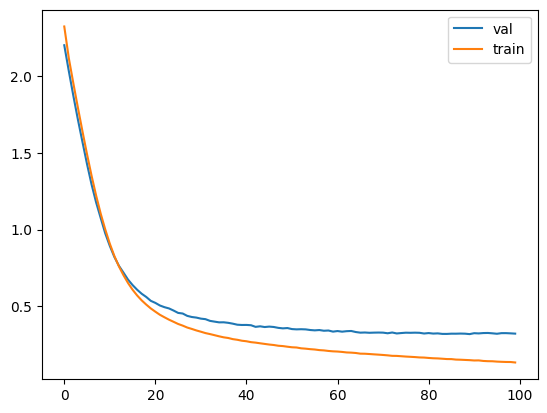

In [12]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val','train'])

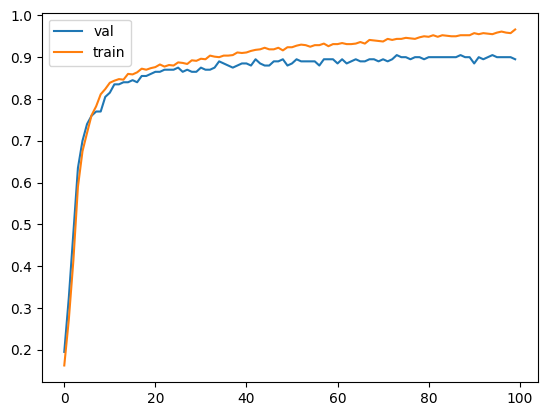

In [13]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val','train'])

### ارزیابی مدل روی داده های **آزمون**

In [14]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.9100

Testing loss: 0.29, acc: 0.91%


### پیش بینی داده های **آموزش**

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [16]:
predicted[0]

array([1.4784238e-05, 1.1534049e-06, 9.9756508e-06, 1.6540391e-05,
       3.9535286e-07, 3.9678275e-06, 6.7613721e-05, 9.9988198e-01,
       2.9707521e-09, 3.5644252e-06], dtype=float32)

In [17]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
a = np.argmax(y_test[0])
print ('y_test is : ',a)
b = np.argmax(predicted[0])
print ('predicted is : ',b)

y_test is :  7
predicted is :  7


In [19]:
predicted_classes = np.argmax(predicted, axis= 1)

In [20]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
#predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 3 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 0 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


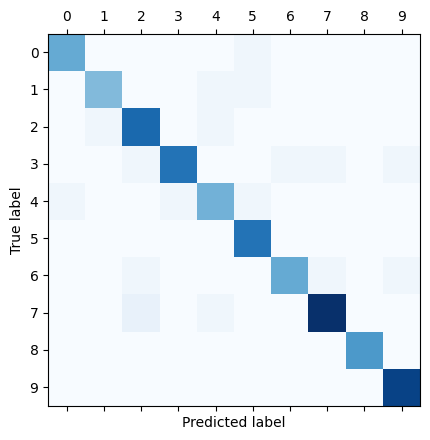

In [21]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");